### SageMaker Set-up

In [8]:
import boto3
import botocore
import sagemaker
import sys


bucket = 'cti-peter-intern' #change s3 bucket name here
prefix = 'sagemaker/rcf-benchmarks'
execution_role = sagemaker.get_execution_role()


# check if the bucket exists
try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your S3 bucket'
          ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == '403':
        print("Hey! You don't have permission to access the bucket, {}.".format(bucket))
    elif e.response['Error']['Code'] == '404':
        print("Hey! Your bucket, {}, doesn't exist!".format(bucket))
    else:
        raise
else:
    print('Training input/output will be stored in: s3://{}/{}'.format(bucket, prefix))

Training input/output will be stored in: s3://cti-peter-intern/sagemaker/rcf-benchmarks


### Load Data

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import ntpath
import time
from datetime import datetime
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sagemaker import RandomCutForest
from sagemaker.predictor import csv_serializer, json_deserializer
%matplotlib inline

# helper function to extract the file name from any path
ntpath.basename("a/b/c")
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

# get data files
path = "./Testing-Data/*.csv"
files_paths = glob.glob(path)
files = [path_leaf(x) for x in files_paths]

In [10]:
# read labels
df_labels = pd.read_csv("./Testing-Data/label/labels.csv")
# df_labels.info()
df_labels = df_labels.set_index(['name'])

### Loop Over All Test Data Sets

2019-07-03 17:35:01 Starting - Starting the training job...
2019-07-03 17:35:07 Starting - Launching requested ML instances......
2019-07-03 17:36:08 Starting - Preparing the instances for training......
2019-07-03 17:37:16 Downloading - Downloading input data...
2019-07-03 17:37:42 Training - Downloading the training image...
2019-07-03 17:38:29 Uploading - Uploading generated training model
2019-07-03 17:38:29 Completed - Training job completed

Docker entrypoint called with argument(s): train
[07/03/2019 17:38:17 INFO 139838461654848] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[07/03/20

Billable seconds: 73
--------------------------------------------------------------------------------------------------!2019-07-03 17:46:59 Starting - Starting the training job......
2019-07-03 17:47:30 Starting - Launching requested ML instances......
2019-07-03 17:48:32 Starting - Preparing the instances for training......
2019-07-03 17:49:39 Downloading - Downloading input data...
2019-07-03 17:50:30 Training - Downloading the training image...
2019-07-03 17:51:01 Uploading - Uploading generated training model
2019-07-03 17:51:01 Completed - Training job completed

Docker entrypoint called with argument(s): train
[07/03/2019 17:50:52 INFO 140147772032832] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u

Billable seconds: 82
---------------------------------------------------------------------------------------------------!2019-07-03 17:59:33 Starting - Starting the training job...
2019-07-03 17:59:35 Starting - Launching requested ML instances.........
2019-07-03 18:01:11 Starting - Preparing the instances for training...
2019-07-03 18:01:55 Downloading - Downloading input data...
2019-07-03 18:02:33 Training - Downloading the training image...
2019-07-03 18:03:05 Uploading - Uploading generated training model
2019-07-03 18:03:05 Completed - Training job completed

Docker entrypoint called with argument(s): train
[07/03/2019 18:02:55 INFO 140428793751360] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'e

Billable seconds: 71
--------------------------------------------------------------------------------------------------------------!2019-07-03 18:12:35 Starting - Starting the training job...
2019-07-03 18:12:36 Starting - Launching requested ML instances......
2019-07-03 18:13:44 Starting - Preparing the instances for training......
2019-07-03 18:14:41 Downloading - Downloading input data...
2019-07-03 18:15:20 Training - Downloading the training image..
Docker entrypoint called with argument(s): train
[07/03/2019 18:15:46 INFO 140625704589120] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[


2019-07-03 18:16:01 Uploading - Uploading generated training model
2019-07-03 18:16:01 Completed - Training job completed
Billable seconds: 80
---------------------------------------------------------------------------------------------------!2019-07-03 18:24:39 Starting - Starting the training job...
2019-07-03 18:24:41 Starting - Launching requested ML instances......
2019-07-03 18:25:49 Starting - Preparing the instances for training......
2019-07-03 18:26:48 Downloading - Downloading input data...
2019-07-03 18:27:27 Training - Downloading the training image..
Docker entrypoint called with argument(s): train
[07/03/2019 18:27:50 INFO 140379345516352] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'ev


2019-07-03 18:28:00 Uploading - Uploading generated training model
2019-07-03 18:28:00 Completed - Training job completed
Billable seconds: 72
---------------------------------------------------------------------------------------------------!2019-07-03 18:36:44 Starting - Starting the training job...
2019-07-03 18:36:58 Starting - Launching requested ML instances......
2019-07-03 18:38:00 Starting - Preparing the instances for training......
2019-07-03 18:39:04 Downloading - Downloading input data...
2019-07-03 18:39:43 Training - Downloading the training image...
2019-07-03 18:40:11 Uploading - Uploading generated training model
Docker entrypoint called with argument(s): train
[07/03/2019 18:40:08 INFO 139856692385600] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_as


2019-07-03 18:40:19 Completed - Training job completed
Billable seconds: 75
--------------------------------------------------------------------------------------------------!

NoCredentialsError: Unable to locate credentials

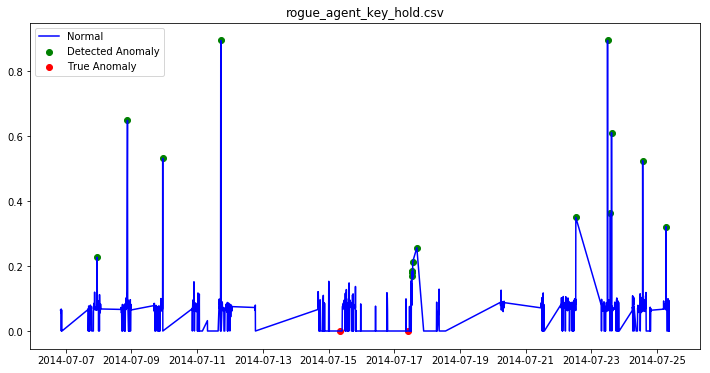

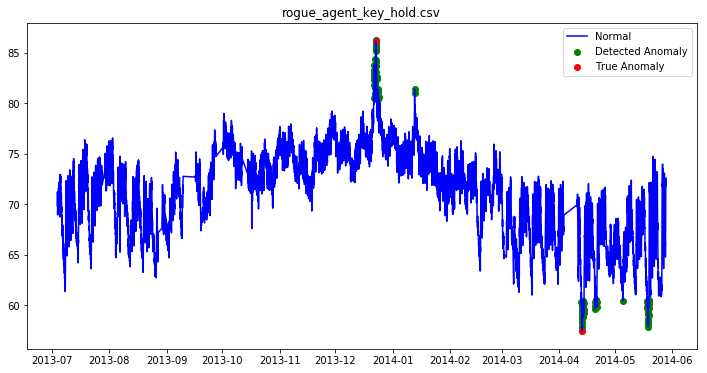

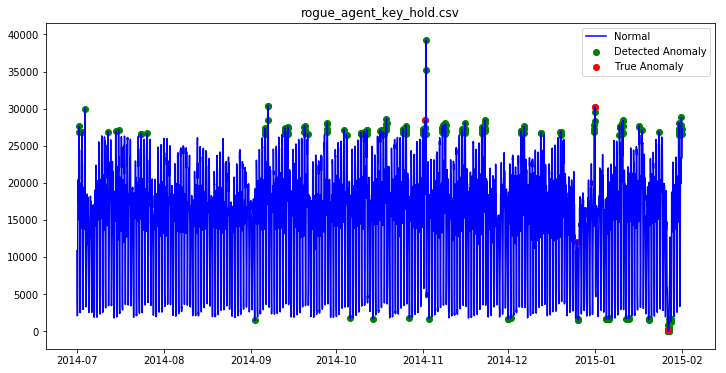

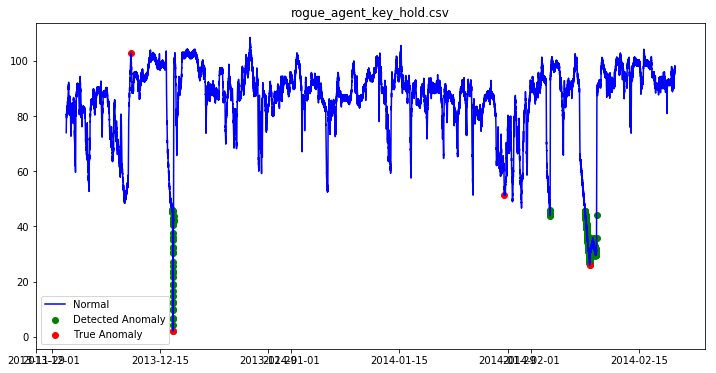

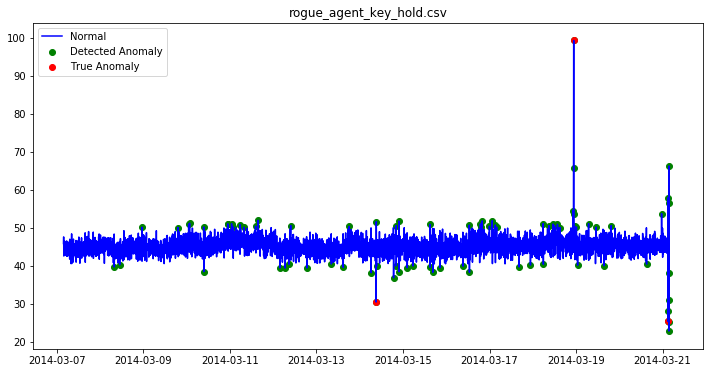

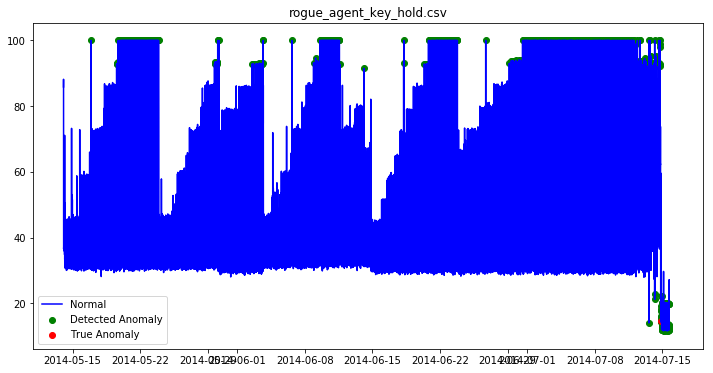

In [27]:
for i in range(len(files)):
    # preprocess labels to timedate objects
    def string_to_datetime(x):
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    label = df_labels.loc[files[i]].values[0].split(',')
    label = np.array([string_to_datetime(x) for x in label])

    # read data
    df = pd.read_csv(files_paths[i])
    # preprocess 'time' to timedate objects
    df['time'] = pd.to_datetime(df['time'])

    # add anomaly labels to df
    def get_label(x):
        if x in label:
            return 1
        else:
            return 0
    df['label'] = df['time'].apply(get_label)

    # time as index
    df = df.set_index(['time'])

    # set outliers fraction
    outliers_fraction = 0.005*len(label)

    session = sagemaker.Session()

    # specify general training job information
    rcf = RandomCutForest(role=execution_role,
                          train_instance_count=1,
                          train_instance_type='ml.m4.xlarge',
                          data_location='s3://{}/{}/'.format(bucket, prefix),
                          output_path='s3://{}/{}/output'.format(bucket, prefix),
                          num_samples_per_tree=512,
                          num_trees=50)

    data = df['value'].values.reshape(-1, 1)
    rcf.fit(rcf.record_set(data))

    # inference
    rcf_inference = rcf.deploy(
        initial_instance_count=1,
        instance_type='ml.m4.xlarge',
    )

    rcf_inference.content_type = 'text/csv'
    rcf_inference.serializer = csv_serializer
    rcf_inference.accept = 'application/json'
    rcf_inference.deserializer = json_deserializer

    results = rcf_inference.predict(data)
    scores = [datum['score'] for datum in results['scores']]
    df['score'] = pd.Series(scores, index=df.index)

    score_mean = df['score'].mean()
    score_std = df['score'].std()
    score_cutoff = score_mean + 3*score_std

    def get_anomaly(x):
        if x > score_cutoff:
            return 1
        else:
            return 0
    df['anomaly'] = df['score'].apply(get_anomaly)

    # visualization
    fig, ax = plt.subplots(figsize=(12,6))
    anomaly = df.loc[df['anomaly'] == 1, ['value']] #anomaly
    true_anomaly = df.loc[df['label'] == 1, ['value']] 
    ax.plot(df.index, df['value'], color='blue', label = 'Normal')
    ax.scatter(anomaly.index,anomaly['value'], color='green', label = 'Detected Anomaly')
    ax.scatter(true_anomaly.index, true_anomaly['value'], color='red', label = 'True Anomaly')
    plt.legend()
    plt.title(files[0])
    plt.savefig('./Plots/' + files[i].split('.')[0] + '-RCF-' + '.png')

### Demo For One Data Set

In [12]:
i = 0
# preprocess labels to timedate objects
def string_to_datetime(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
label = df_labels.loc[files[i]].values[0].split(',')
label = np.array([string_to_datetime(x) for x in label])

In [13]:
# read data
df = pd.read_csv(files_paths[i])
# preprocess 'time' to timedate objects
df['time'] = pd.to_datetime(df['time'])

# add anomaly labels to df
def get_label(x):
    if x in label:
        return 1
    else:
        return 0
df['label'] = df['time'].apply(get_label)

# time as index
df = df.set_index(['time'])

In [14]:
# set outliers fraction
outliers_fraction = 0.005*len(label)

In [15]:
session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.m4.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=512,
                      num_trees=50)

In [ ]:
data = df['value'].values.reshape(-1, 1)
rcf.fit(rcf.record_set(data))

In [26]:
# inference
rcf_inference = rcf.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
)

In [21]:
rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [22]:
results = rcf_inference.predict(data)
scores = [datum['score'] for datum in results['scores']]
df['score'] = pd.Series(scores, index=df.index)

In [23]:
score_mean = df['score'].mean()
score_std = df['score'].std()
score_cutoff = score_mean + 3*score_std

In [24]:
def get_anomaly(x):
    if x > score_cutoff:
        return 1
    else:
        return 0
df['anomaly'] = df['score'].apply(get_anomaly)

In [ ]:
# visualization
fig, ax = plt.subplots(figsize=(12,6))
anomaly = df.loc[df['anomaly'] == 1, ['value']] #anomaly
true_anomaly = df.loc[df['label'] == 1, ['value']] 
ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['value'], color='green', label = 'Detected Anomaly')
ax.scatter(true_anomaly.index, true_anomaly['value'], color='red', label = 'True Anomaly')
plt.legend()
plt.title(files[0])
# plt.savefig('./Plots/' + files[i].split('.')[0] + '-RCF-' + '.png')
plt.show()

In [ ]:
# get indices of anomalies
a = df['anomaly'].values
ind = np.where(a == 1)[0]

# get the starting and ending points of anomaly intervals
start = set(ind) - (set(ind) & set(ind+1))
end = set(ind) - (set(ind) & set(ind-1))
time = df.index.values

# save intervals into a list
anomaly_interval = []
for s,e in zip(start, end):
    if s==e:
        anomaly_interval.append(time[s])
    else:
        anomaly_interval.append([time[s], time[e]])

In [ ]:
# output the intervals
anomaly_interval